# Step 1: Reading and Understanding the Data

In [4]:
#Load the libraryss

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

 # Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
sns.__version__

'0.11.2'

In [6]:
np.__version__

'1.21.6'

In [7]:
pd.__version__

'1.3.5'

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# load dataset
day0 = pd.read_csv("/content/drive/MyDrive/1upgradsheets/day.csv")

In [10]:
#summary of columns in the dataset
day0.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
#number of rows and columns
day0.shape

(730, 16)

# Data Checking


In [12]:
# datatype of columns and check if null values
day0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [13]:
# see column names
day0.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# rename for understanding 
day0.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 

In [15]:
# mapping variables for season, month, weathersit, weekday

day0['season']=day0.season.map({1: 'Spring', 2: 'Summer',3:'Fall', 4:'Winter' })
day0['month']=day0.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
day0['weathersit']=day0.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'})
day0['weekday']=day0.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

day0.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Data Visualisation


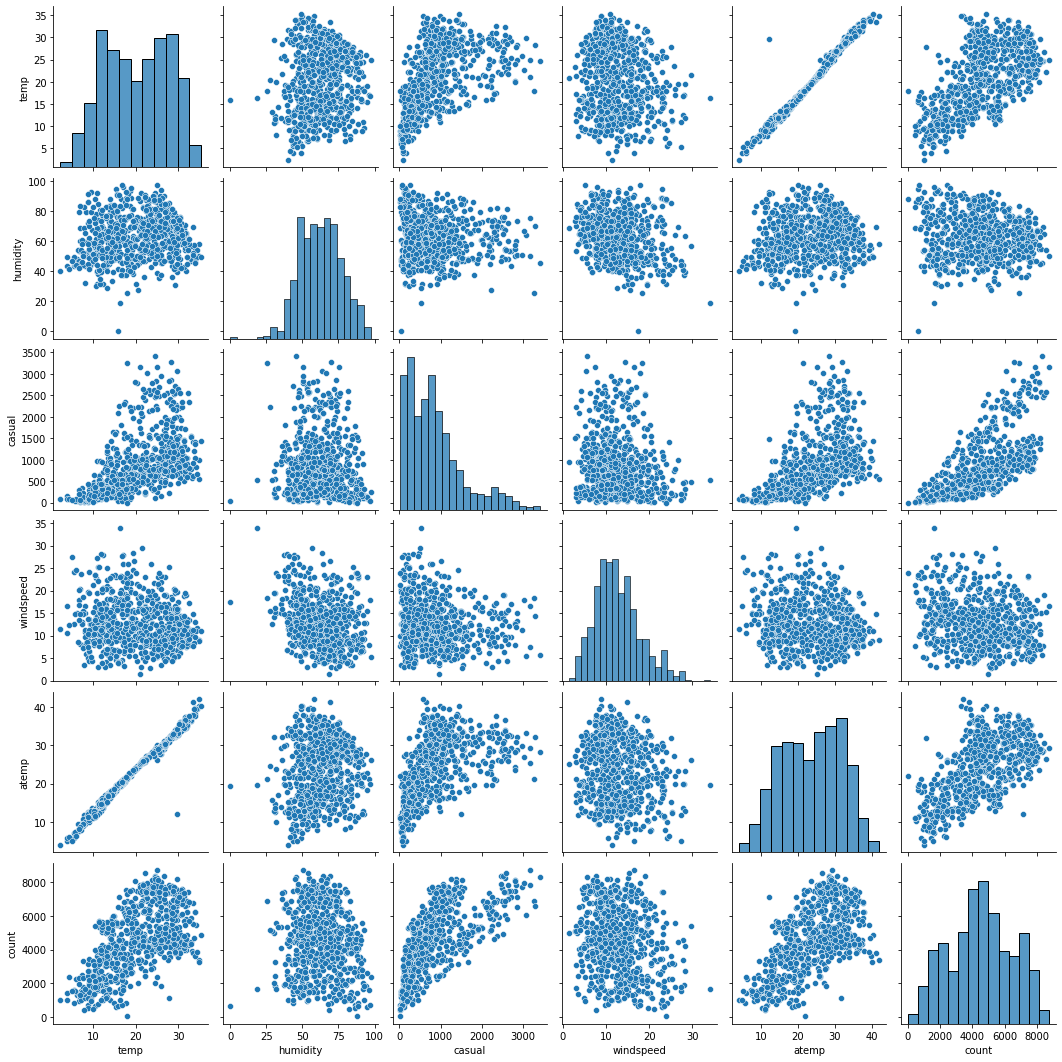

In [16]:
# Pairplot for numeric variables
sns.pairplot(day0, vars=['temp', 'humidity','casual','windspeed','atemp','count'])
plt.show()

By analysing all above plots, we can see that temp independent variables  positively correlated to the 'count' variable.

- Bike rentals are correlated to temperature

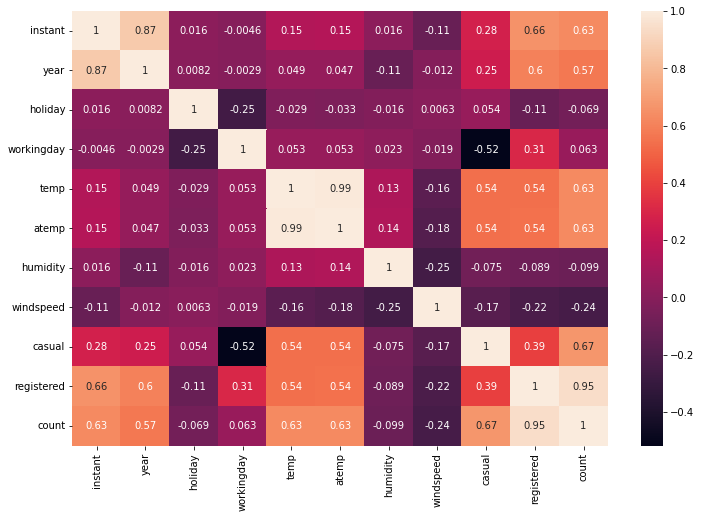

In [17]:
# heat map 
plt.figure(figsize=(12, 8))
sns.heatmap(day0.corr(),annot=True)

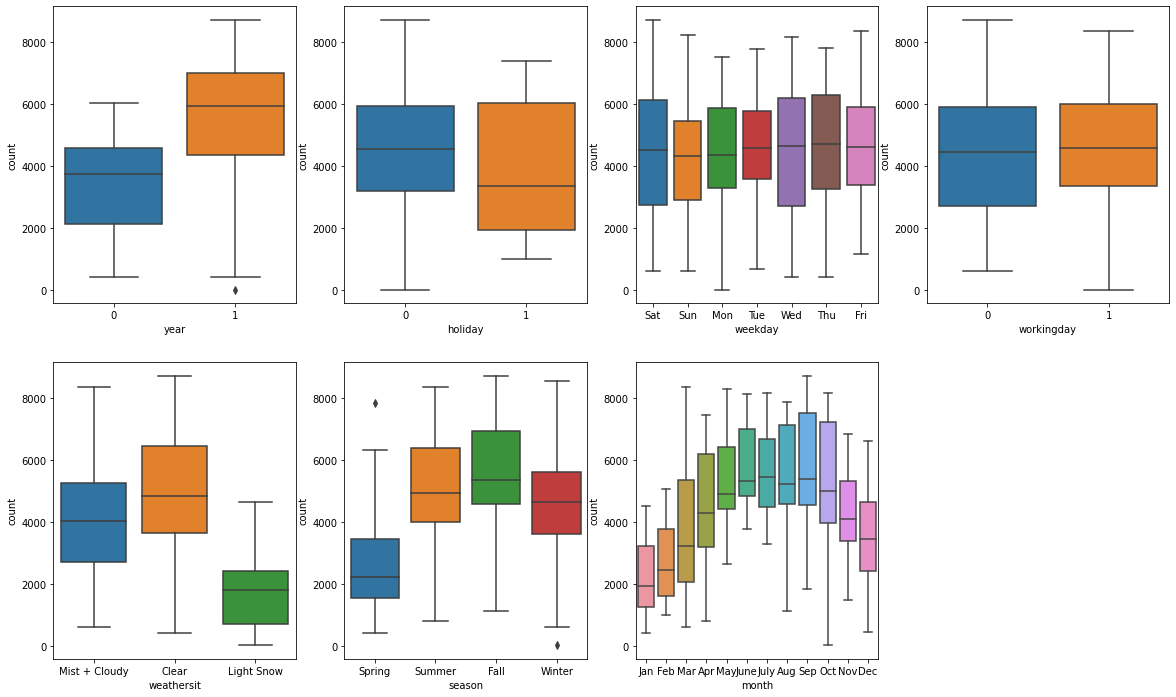

In [18]:
# Relation between categorial and non-contegorial variable 
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'count', data = day0)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = day0)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'count', data = day0)
plt.subplot(2,4,4)
sns.boxplot(x = 'workingday', y = 'count', data = day0)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = day0)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = day0)
plt.subplot(2,4,7)
sns.boxplot(x = 'month', y = 'count', data = day0)


plt.show()

From above pairplot, we can notice that,
- bike rental is more in 2019 year comapred to 2018 
- bike rental is more on holidays
- bike rental is more on Sat, Wed, Thu and Working day
- bike rental is more in clear weather in Summer and Fall season

In [19]:
# drop unwanted variables
day0=day0.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)

## Step 3: Data Preparation

- Dummy variables

In [20]:
month0 = pd.get_dummies(day0.month,drop_first=True)
weekday0 = pd.get_dummies(day0.weekday,drop_first=True)
weathersit0 = pd.get_dummies(day0.weathersit,drop_first=True)
season0 = pd.get_dummies(day0.season,drop_first=True)

In [21]:
day1 = pd.concat([day0, month0, weekday0 ,weathersit0, season0], axis=1)
day1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter
0,Spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,Spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [22]:
# drop variables as we have created dummuies for them
day1.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
day1.head()

,year,holiday,workingday,temp,humidity,windspeed,count,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [23]:
day1.shape

(730, 29)

## Step 4: Splitting the Data into Training and Testing Sets

In [24]:
# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(day1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Rescaling the Features


In [26]:
scaler = MinMaxScaler()

In [27]:
num_vars=['temp','humidity','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
df_train[num_vars].describe()

,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620
std,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.540519,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


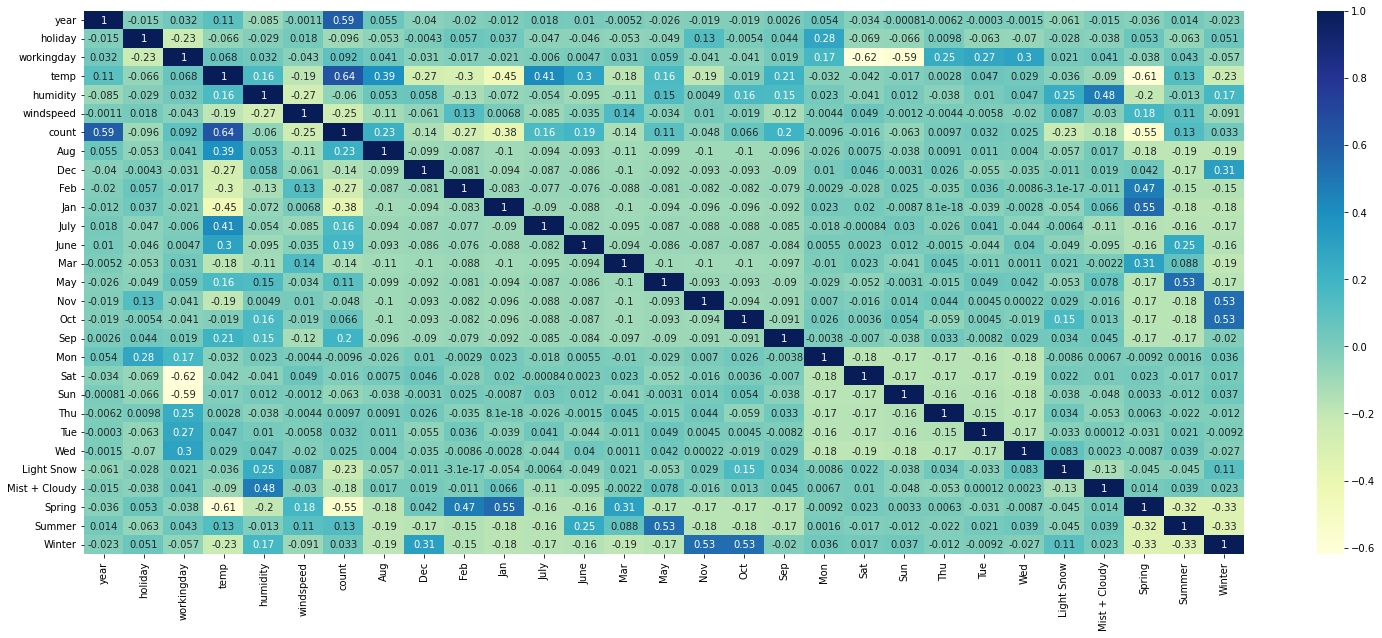

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

count is very much corelated to temperature

### Dividing into X and Y sets for the model building

In [30]:
y_train = df_train.pop('count')
X_train = df_train

## Step 5: Building our model

In [31]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### RFE
Recursive feature elimination

In [32]:
rfe = RFE(lm, step = 15 )             # running RFE
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', False, 2),
 ('June', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 2),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 2),
 ('Tue', False, 2),
 ('Wed', False, 2),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Spring', False, 2),
 ('Summer', False, 2),
 ('Winter', True, 1)]

In [34]:
# list of column which are true 
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Dec',
       'Jan', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'Winter'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_] 

Index(['Aug', 'Feb', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Thu',
       'Tue', 'Wed', 'Spring', 'Summer'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [36]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [37]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [38]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [39]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.59e-179
Time:                        13:45:47   Log-Likelihood:                 486.19
No. Observations:                 510   AIC:                            -944.4
Df Residuals:                     496   BIC:                            -885.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1901      0.024      7.831

### deleting holiday variable due to high p-value (0.235)

In [40]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.59e-179
Time:                        13:45:47   Log-Likelihood:                 486.19
No. Observations:                 510   AIC:                            -944.4
Df Residuals:                     496   BIC:                            -885.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1639      0.039      4.170

In [41]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,88.03
2,workingday,9.06
9,Sat,6.06
10,Sun,5.73
4,humidity,1.89
3,temp,1.87
12,Mist + Cloudy,1.57
7,Jan,1.50
13,Winter,1.33
11,Light Snow,1.25


#### deleting const variable due to high VIF value (88.03)


In [42]:
X_train_new1 = X_train_new.drop(["const"], axis = 1)
X_train_lm1 = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train,X_train_lm1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.59e-179
Time:                        13:45:47   Log-Likelihood:                 486.19
No. Observations:                 510   AIC:                            -944.4
Df Residuals:                     496   BIC:                            -885.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1639      0.039      4.170

In [43]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,27.38
1,workingday,16.11
2,temp,11.75
8,Sat,4.39
4,windspeed,4.29
9,Sun,4.26
11,Mist + Cloudy,2.22
0,year,2.07
12,Winter,1.74
6,Jan,1.54


#### dropping humidity due to high VIF value (27.38) 


In [44]:
X_train_new2 = X_train_new1.drop(["humidity"], axis = 1)
X_train_lm2 = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train,X_train_lm2).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.62e-178
Time:                        13:45:48   Log-Likelihood:                 481.05
No. Observations:                 510   AIC:                            -936.1
Df Residuals:                     497   BIC:                            -881.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0948      0.033      2.870

In [45]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,11.18
2,temp,8.98
3,windspeed,4.29
7,Sat,3.36
8,Sun,3.09
0,year,2.06
11,Winter,1.58
10,Mist + Cloudy,1.57
5,Jan,1.44
4,Dec,1.31


#### VIF is high for workingday varible (11.18), dropping workingday varible.

In [46]:
X_train_new3 = X_train_new2.drop(["workingday"], axis = 1)
X_train_lm3 = sm.add_constant(X_train_new3)
lm = sm.OLS(y_train,X_train_lm3).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.39e-176
Time:                        13:45:48   Log-Likelihood:                 472.52
No. Observations:                 510   AIC:                            -921.0
Df Residuals:                     498   BIC:                            -870.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2001      0.021      9.440

In [47]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.70
2,windspeed,3.23
0,year,2.04
9,Mist + Cloudy,1.50
10,Winter,1.47
3,Dec,1.23
6,Sat,1.22
7,Sun,1.20
4,Jan,1.18
5,Sep,1.16


#### dropping windspeed variable due to high VIF value (3.23)

In [48]:
X_train_new4 = X_train_new3.drop(["windspeed"], axis = 1)
X_train_lm4 = sm.add_constant(X_train_new4)
lm = sm.OLS(y_train,X_train_lm4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.51e-169
Time:                        13:45:48   Log-Likelihood:                 454.28
No. Observations:                 510   AIC:                            -886.6
Df Residuals:                     499   BIC:                            -840.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1220      0.017      6.990

In [49]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.63
0,year,2.00
8,Mist + Cloudy,1.48
9,Winter,1.45
2,Dec,1.22
5,Sat,1.20
6,Sun,1.19
4,Sep,1.14
3,Jan,1.12
7,Light Snow,1.06


## Step7: Residual Analysis of the train data

In [50]:
y_train_price = lm.predict(X_train_lm4)

In [51]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

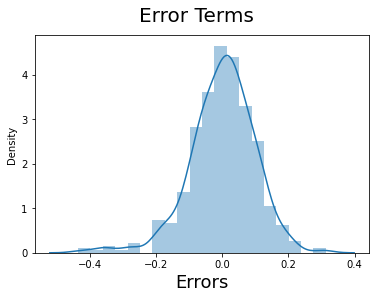

In [52]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

In [53]:
num_vars=['temp','humidity','windspeed','count']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,humidity,windspeed,count,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter
184,0,1,0,0.837241,0.534223,0.149393,0.704300,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.911423,0.470417,0.231142,0.725421,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.496221,0.777843,0.443398,0.278853,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.890387,0.236659,0.449707,0.545512,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.821739,0.070765,0.682387,0.569148,0,0,0,...,0,0,1,0,0,0,0,0,1,0


#### Applying the scaling on the test sets


In [54]:
y_test = df_test.pop('count')
X_test = df_test

In [55]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [56]:
X_test_new.head()

,const,year,temp,Dec,Jan,Sep,Sat,Sun,Light Snow,Mist + Cloudy,Winter
184,1.0,0,0.837241,0,0,0,0,0,0,1,0
535,1.0,1,0.911423,0,0,0,0,0,0,0,0
299,1.0,0,0.496221,0,0,0,0,0,0,1,1
221,1.0,0,0.890387,0,0,0,0,0,0,0,0
152,1.0,0,0.821739,0,0,0,0,0,0,0,0


In [57]:
y_pred = lm.predict(X_test_new)

In [58]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7816326587655387

In [59]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-(r2_score(y_test,y_pred)))*(10-1)/(10-1-1)
print(Adj_r2)


0.754336741111231


## Step 9: Model Evaluation


Text(0, 0.5, 'y_pred')

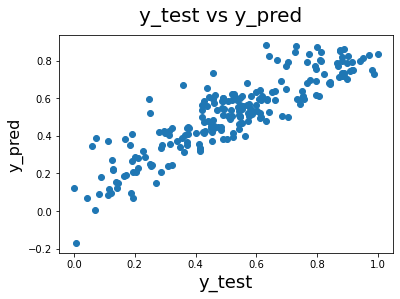

In [60]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Equation of best fit model is 

$ count =  0.2331 \times  year + 0.5377 \times  temp - 0.0321 \times  Dec - 0.0737 \times  Jan + 0.0757 \times  Sep + 0.0119 \times  Sat - 0.0456 \times  Sun - 0.3047 \times  Light Snow - 0.0723 \times  Mist Cloudy + 0.1040 \times  Winter $


## Result Comparison between Train model and Test:
- Train R^2 : 0.804
- Train Adjusted R^2 : 0.800
- Test R^2: 0.781 
- Test Adjusted R^2: 0.754
- Difference in R^2 between train and test: 1.029%
- Difference in adjusted R^2 between Train and test: 1.035% which is less than 5%


Conclusion

Significant variables to predict the demand for shared bikes

- holiday
- temp
- Season
- months( September, December, January )
- Year (2019)
- Saturday and Sunday
- weathersit (Mist + Cloudy, Winter)